In [8]:
import pandas as pd
import pymongo

from pymongo import MongoClient
from tqdm import tqdm
from matplotlib import pyplot as plt

In [9]:
client = MongoClient(host='10.101.4.93')
db = client.soccerdb

Import data from mongodb to pandas

In [10]:
players_collection = db.players
players = pd.DataFrame(list(players_collection.find()))
matches_collection = db.matches
matches = pd.DataFrame(list(matches_collection.find()))
events_collection = db.events
events = pd.DataFrame(list(events_collection.find()))    
results_collection = db.results
results = pd.DataFrame(list(results_collection.find()))

In [4]:
players.head()

,_id,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,5da33c4204f673bbf2661cdd,"{'id': '792', 'alpha3code': 'TUR', 'alpha2code...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'id': '792', 'alpha3code': 'TUR', 'alpha2code...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,5da33c4204f673bbf2661cdf,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'id': '686', 'alpha3code': 'SEN', 'alpha2code...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,5da33c4204f673bbf2661ce1,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,5da33c4204f673bbf2661ce3,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'id': '686', 'alpha3code': 'SEN', 'alpha2code...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,5da33c4204f673bbf2661ce5,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'id': '250', 'alpha3code': 'FRA', 'alpha2code...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


In [5]:
players.hist(column = 'height')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a0a31d68>]],
      dtype=object)

In [6]:
list(db.players.find({'height': {'$lt': 25}},{'_id': 0, 'shortName': 1, 'height': 1}))[:5]

[{'height': 0, 'shortName': 'V\\u00edctor L\\u00f3pez'},
 {'height': 0, 'shortName': '\\u00cdan Pino'},
 {'height': 0, 'shortName': 'B. V\\u00e9rit\\u00e9'},
 {'height': 0, 'shortName': 'R. A\\u00eft Nouri'},
 {'height': 0, 'shortName': 'S. Sanogo'}]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a0a00d30>]],
      dtype=object)

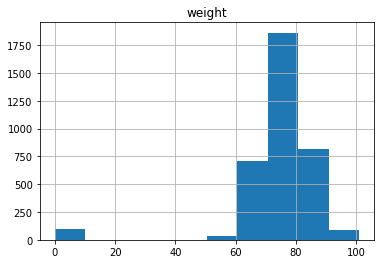

In [7]:
players.hist(column = 'weight')

In [8]:
list(db.players.find({'weight': {'$lt': 25}},{'_id': 0, 'shortName': 1, 'weight': 1}))[:5]

[{'shortName': 'V\\u00edctor L\\u00f3pez', 'weight': 0},
 {'shortName': '\\u00cdan Pino', 'weight': 0},
 {'shortName': 'M. S\\u00fcndermann', 'weight': 0},
 {'shortName': 'Brais M\\u00e9ndez', 'weight': 0},
 {'shortName': 'B. V\\u00e9rit\\u00e9', 'weight': 0}]

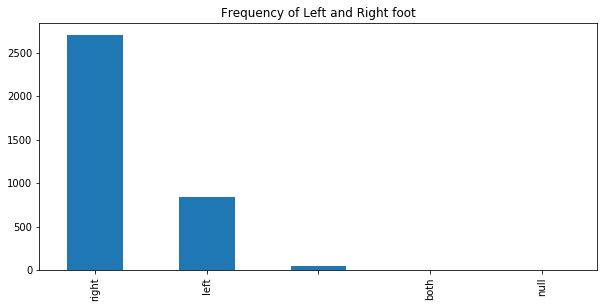

In [34]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
players['foot'].value_counts().plot(kind='bar', title='Frequency of Left and Right foot')

In [27]:
players.isna().sum()

_id                       0
birthArea                 0
birthDate                 0
currentNationalTeamId     0
currentTeamId            91
firstName                 0
foot                      0
height                    0
lastName                  0
middleName                0
passportArea              0
role                      0
shortName                 0
weight                    0
wyId                      0
dtype: int64

In [29]:
matches.isna().sum()

_id                0
competitionId      0
date               0
dateutc            0
duration           0
gameweek           0
groupName        380
label              0
referees           0
roundId            0
seasonId           0
status             0
teamsData          0
venue              0
winner             0
wyId               0
dtype: int64

In [30]:
events.isna().sum()

_id             0
eventId         0
eventName       0
eventSec        0
id              0
matchId         0
matchPeriod     0
playerId        0
positions       0
subEventId      0
subEventName    0
tags            0
teamId          0
dtype: int64

In [35]:
events.head()

,_id,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,5da38ad404f673bbf2701349,8,Pass,1.255990,88178642,1694390,1H,26010,"[{'x': 50, 'y': 48}, {'x': 47, 'y': 50}]",85,Simple pass,[{'id': 1801}],4418
1,5da38ad404f673bbf270134b,8,Pass,2.351908,88178643,1694390,1H,3682,"[{'x': 47, 'y': 50}, {'x': 41, 'y': 48}]",85,Simple pass,[{'id': 1801}],4418
2,5da38ad404f673bbf270134d,8,Pass,3.241028,88178644,1694390,1H,31528,"[{'x': 41, 'y': 48}, {'x': 32, 'y': 35}]",85,Simple pass,[{'id': 1801}],4418
3,5da38ad404f673bbf270134f,8,Pass,6.033681,88178645,1694390,1H,7855,"[{'x': 32, 'y': 35}, {'x': 89, 'y': 6}]",83,High pass,[{'id': 1802}],4418
4,5da38ad404f673bbf2701351,1,Duel,13.143591,88178646,1694390,1H,25437,"[{'x': 89, 'y': 6}, {'x': 85, 'y': 0}]",12,Ground defending duel,"[{'id': 702}, {'id': 1801}]",4418


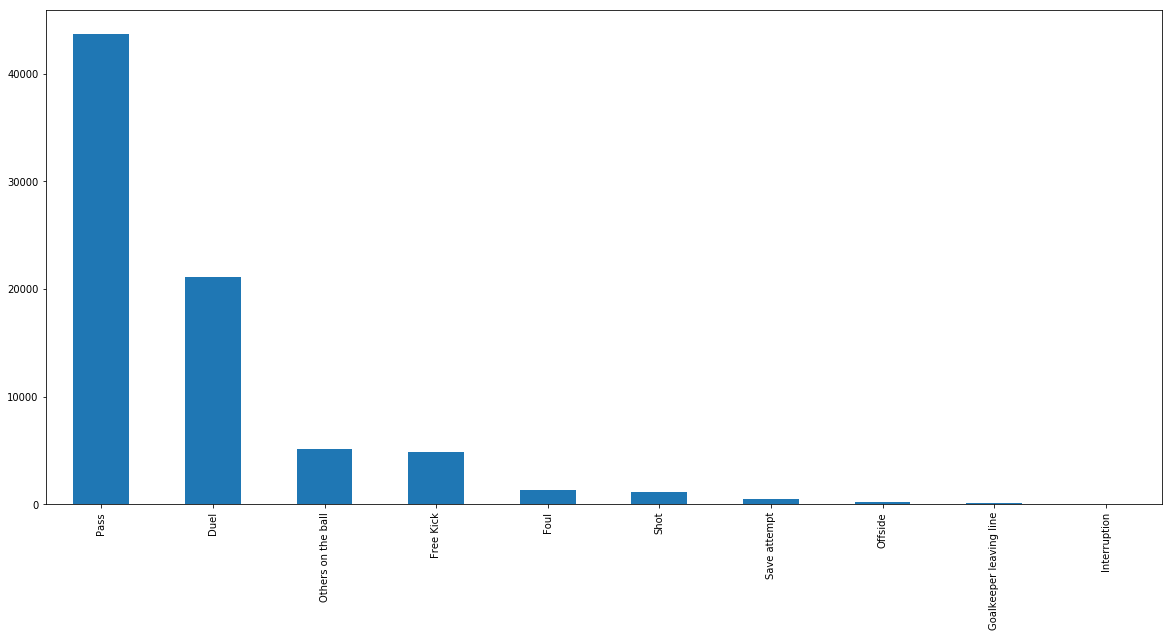

In [38]:
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
events['eventName'].value_counts().plot(kind='bar')

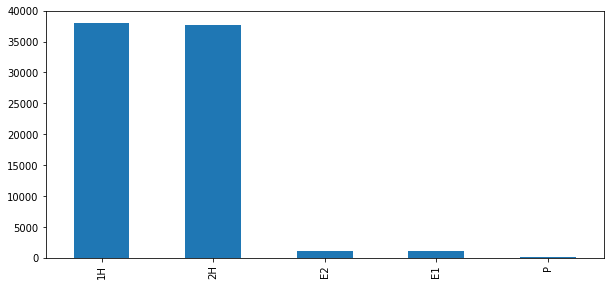

In [39]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
events['matchPeriod'].value_counts().plot(kind='bar')

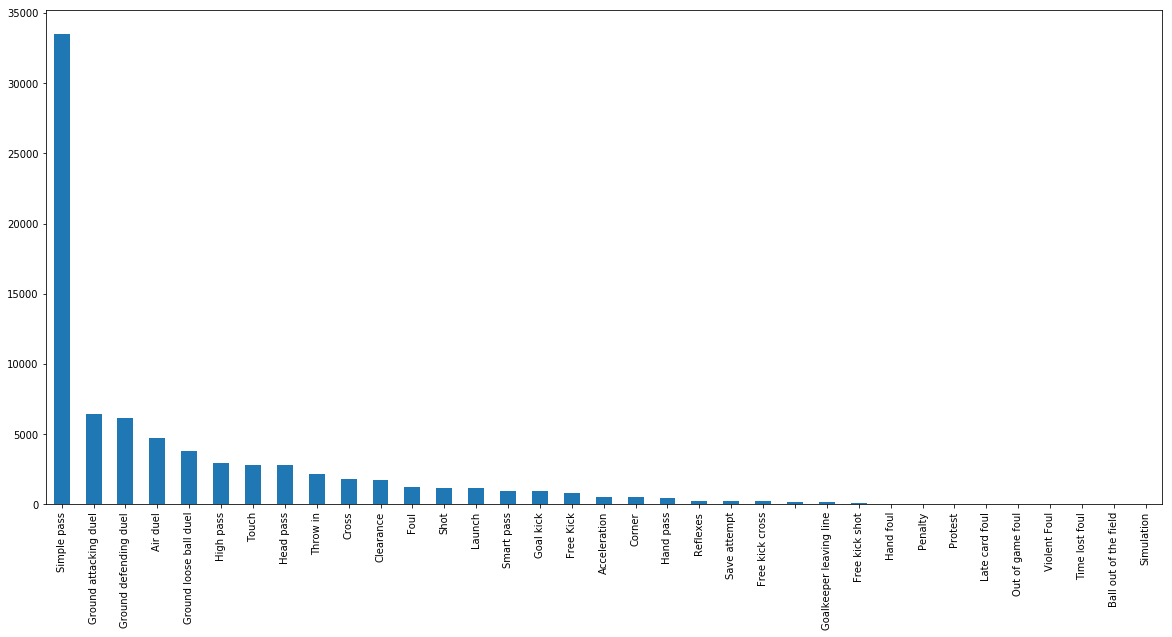

In [40]:
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
events['subEventName'].value_counts().plot(kind='bar')

In [41]:
matches.head()

,_id,competitionId,date,dateutc,duration,gameweek,groupName,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,5da3420304f673bbf26abb0b,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,NaN,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'coachId': 251025, 'side': 'home', '...",,3161,2576335
1,5da3420404f673bbf26abbb6,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,NaN,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3315': {'coachId': 20603, 'side': 'home', 't...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,5da3420404f673bbf26abbb9,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,NaN,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3172': {'coachId': 210116, 'side': 'away', '...",,3173,2576329
3,5da3420404f673bbf26abbbb,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,NaN,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'coachId': 272970, 'side': 'home', '...",,3165,2576330
4,5da3420404f673bbf26abbbd,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,NaN,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'coachId': 20481, 'side': 'away', 't...",,3163,2576331


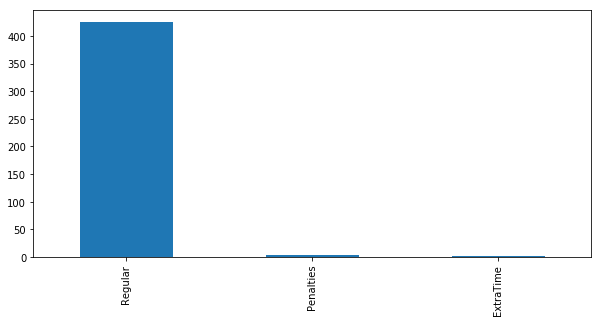

In [43]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
matches['duration'].value_counts().plot(kind='bar')

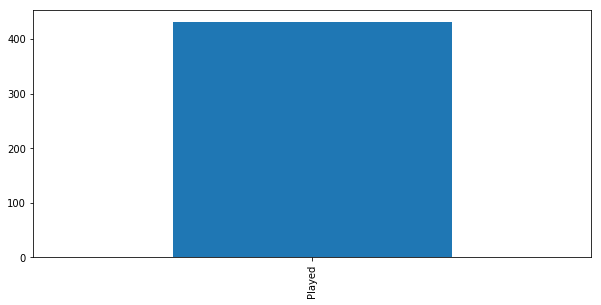

In [44]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (2, 1)
plt.subplot2grid(fig_dims, (0, 0))
matches['status'].value_counts().plot(kind='bar')

In [48]:
results.head()

,_id,matchId,meanPlayerOverall,meanPlayerPotential,meanPrevScore,meanPrevScoreET,meanPrevScoreHT,meanPrevScoreP,numAccuratePass,numDuel,...,numFreeKick,numGoalkeeperLeavingLine,numInterruption,numOffside,numOthersOnTheBall,numPass,numSaveAttempt,numShot,rateAccuratePass,teamId
0,5da399af04f673bbf273049a,1694430,58.217391,59.478261,1.000000,0.0,0.666667,0.0,259,108,...,16,0,0,0,14,294,1,13,0.880952,3148
1,5da399b004f673bbf27304af,1694390,71.086957,72.217391,0.000000,0.0,0.000000,0.0,225,115,...,29,0,1,2,35,265,1,8,0.849057,4418
2,5da399b104f673bbf27304c4,1694428,38.173913,38.913043,1.333333,0.0,0.666667,0.0,145,96,...,23,0,0,1,29,178,0,1,0.814607,9905
3,5da399b104f673bbf27304d9,1694423,38.173913,38.913043,1.000000,0.0,1.000000,0.0,242,99,...,29,0,0,4,13,286,0,12,0.846154,9905
4,5da399b204f673bbf27304ee,1694391,30.608696,31.304348,0.000000,0.0,0.000000,0.0,143,84,...,19,1,0,1,21,172,3,4,0.831395,8731


In [59]:
results.isna().sum()

_id                         0
matchId                     0
meanPlayerOverall           0
meanPlayerPotential         0
meanPrevScore               0
meanPrevScoreET             0
meanPrevScoreHT             0
meanPrevScoreP              0
numAccuratePass             0
numDuel                     0
numFoul                     0
numFreeKick                 0
numGoalkeeperLeavingLine    0
numInterruption             0
numOffside                  0
numOthersOnTheBall          0
numPass                     0
numSaveAttempt              0
numShot                     0
rateAccuratePass            0
teamId                      0
dtype: int64

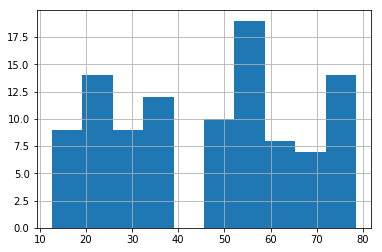

In [51]:
results['meanPlayerOverall'].hist()

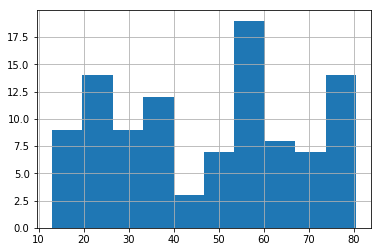

In [52]:
results['meanPlayerPotential'].hist()

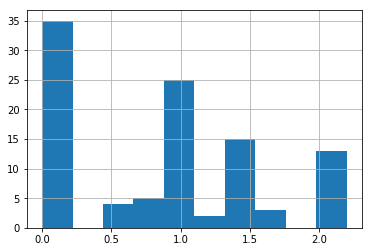

In [53]:
results['meanPrevScore'].hist()

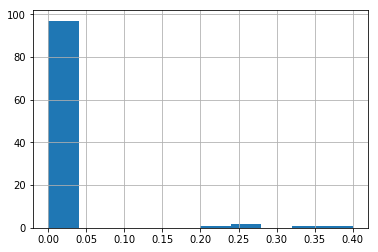

In [54]:
results['meanPrevScoreET'].hist()

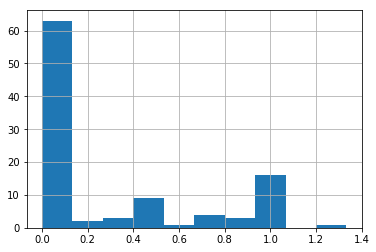

In [55]:
results['meanPrevScoreHT'].hist()

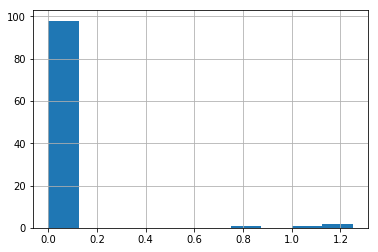

In [56]:
results['meanPrevScoreP'].hist()

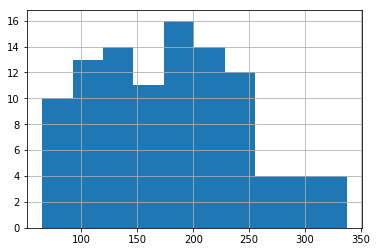

In [57]:
results['numAccuratePass'].hist()

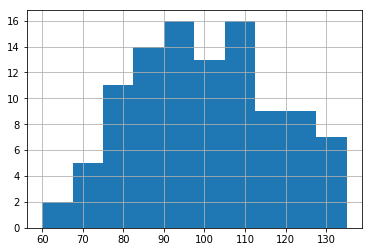

In [58]:
results['numDuel'].hist()

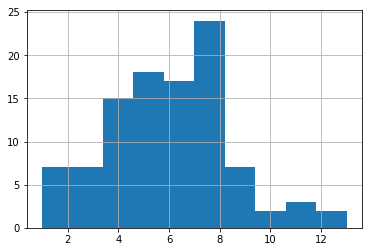

In [60]:
results['numFoul'].hist()

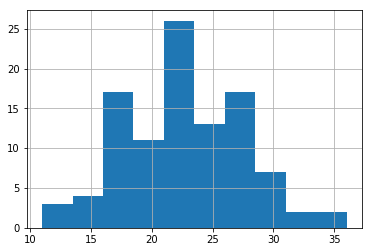

In [61]:
results['numFreeKick'].hist()

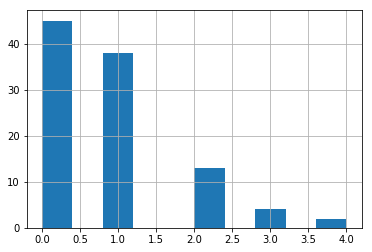

In [62]:
results['numGoalkeeperLeavingLine'].hist()

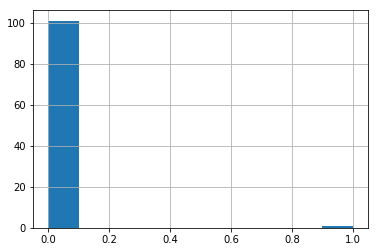

In [63]:
results['numInterruption'].hist()

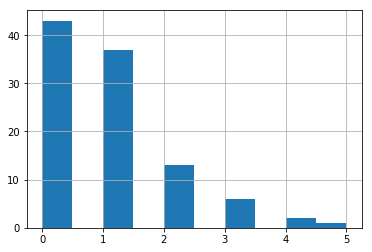

In [64]:
results['numOffside'].hist()

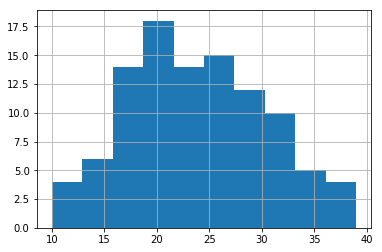

In [65]:
results['numOthersOnTheBall'].hist()

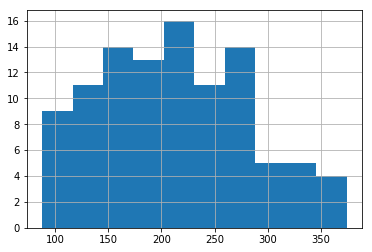

In [66]:
results['numPass'].hist()

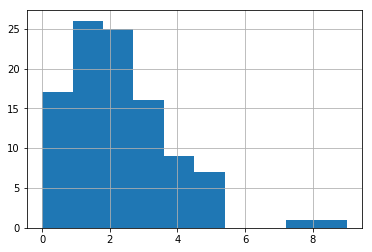

In [67]:
results['numSaveAttempt'].hist()

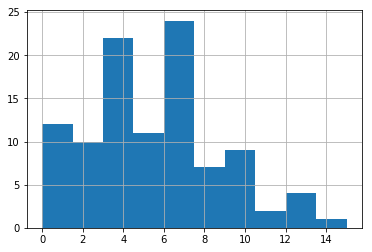

In [68]:
results['numShot'].hist()

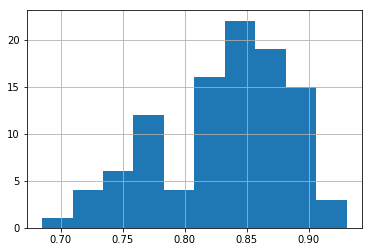

In [69]:
results['rateAccuratePass'].hist()

### Finding outliers

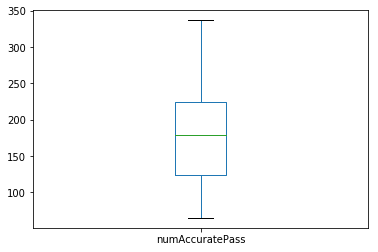

In [23]:
results['numAccuratePass'].plot(kind='box')
plt.show()

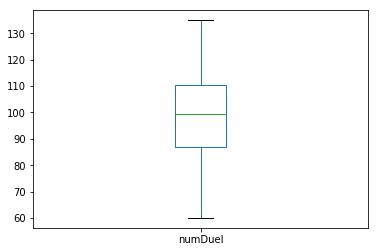

In [22]:
results['numDuel'].plot(kind='box')
plt.show()

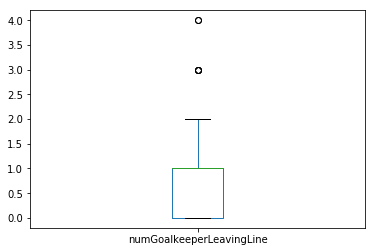

In [19]:
results['numGoalkeeperLeavingLine'].plot(kind='box')
plt.show()

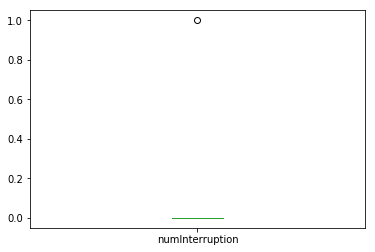

In [18]:
results['numInterruption'].plot(kind='box')
plt.show()

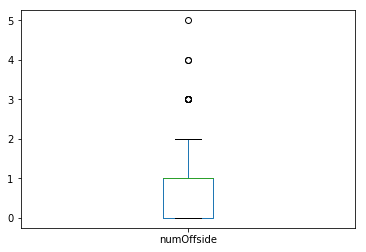

In [17]:
results['numOffside'].plot(kind='box')
plt.show()

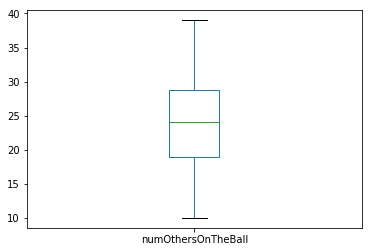

In [16]:
results['numOthersOnTheBall'].plot(kind='box')
plt.show()


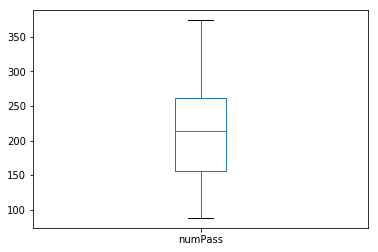

In [15]:
results['numPass'].plot(kind='box')
plt.show()

In [ ]:
new = results[['meanPrevScoreET', 'meanPrevScoreP', 'meanPrevScoreHT', 'meanPrevScore']].copy()
new.plot.box()

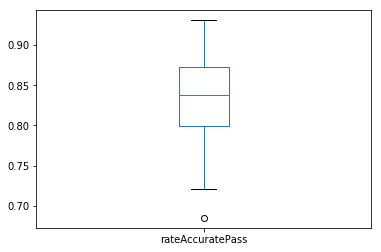

In [12]:
results['rateAccuratePass'].plot(kind='box')
plt.show()

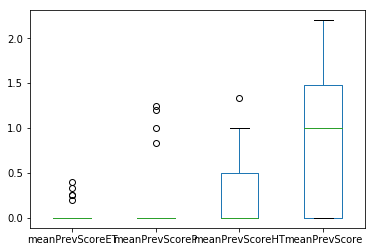

In [40]:
new = results[['meanPrevScoreET', 'meanPrevScoreP', 'meanPrevScoreHT', 'meanPrevScore']].copy()
new.plot.box()

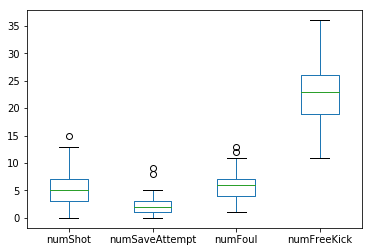

In [41]:
new = results[['numShot', 'numSaveAttempt', 'numFoul', 'numFreeKick']].copy()
new.plot.box()